Problem 3 PCA: Best Places to Live

In [7]:
import pandas as pd 

1. Read the data and construct a table with 9 columns containing the numerical ratings. (Ignore
the last 5 columns – they consist auxiliary information such as longitude/latitude, state, etc.)

In [11]:
df = pd.read_csv('places.txt',delim_whitespace=True,header=None)

In [12]:
df.columns = ["Location", "Climate", "Housing", "HealthCare", "Crime", "Transportation","Education", "Arts", "Recreation", "EconomicWelfare", "p", "q", "r", "s","t"]

In [13]:
df1 = df.iloc[:,1:10]
df1.head()

,Climate,Housing,HealthCare,Crime,Transportation,Education,Arts,Recreation,EconomicWelfare
0,521,6200,237,923,4031,2757,996,1405,7633
1,575,8138,1656,886,4883,2438,5564,2632,4350
2,468,7339,618,970,2531,2560,237,859,5250
3,476,7908,1431,610,6883,3399,4655,1617,5864
4,659,8393,1853,1483,6558,3026,4496,2612,5727


2. Replace each value in the matrix by its base-10 logarithm. (This pre-processing is done for
convenience since the numerical range of the ratings is large.) You should now have a data matrix X
whose rows are 9-dimensional vectors representing the different cities.

In [15]:
import numpy as np

In [16]:
X = np.log10(df1.values)

In [17]:
X

array([[2.71683772, 3.79239169, 2.37474835, ..., 2.99825934, 3.14767632,
        3.88269526],
       [2.75966784, 3.91051769, 3.21906033, ..., 3.74538712, 3.42028588,
        3.63848926],
       [2.67024585, 3.86563689, 2.79098848, ..., 2.37474835, 2.93399316,
        3.7201593 ],
       ...,
       [2.73239376, 3.92277734, 2.85308953, ..., 3.0094509 , 2.92531209,
        3.69425411],
       [2.75587486, 3.84639897, 3.04020663, ..., 3.44669247, 3.12287092,
        3.59039595],
       [2.78390358, 3.89625056, 2.32633586, ..., 2.08635983, 2.96284268,
        3.67154309]])

3. Perform PCA on the data. Remember to center the data points first by computing the mean
data vector μ and subtracting it from every point. With the centered data matrix, do an SVD and
compute the principal components.

In [19]:
U = X.mean(axis=0)
X = X - U
X[1:10,:]

array([[ 0.04117371,  0.00302653,  0.26357377, -0.00419336,  0.09148505,
        -0.05957284,  0.53917768,  0.19371854, -0.09569287],
       [-0.04824828, -0.04185427, -0.16449809,  0.03514465, -0.19390953,
        -0.03836657, -0.83146109, -0.29257419, -0.01402282],
       [-0.04088718, -0.0094245 ,  0.20015307, -0.16629725,  0.24057609,
         0.08474463,  0.46171025, -0.01785733,  0.03401184],
       [ 0.10039128,  0.01642607,  0.31238886,  0.21951407,  0.21956974,
         0.03426239,  0.44661687,  0.19040582,  0.02374506],
       [-0.00249079, -0.1426428 , -0.14930659, -0.09009267, -0.20910047,
         0.02644227, -0.68246297, -0.21881957, -0.01369205],
       [ 0.02891768,  0.01095859, -0.16239496, -0.24066396, -0.13765842,
         0.050876  ,  0.1617053 , -0.17851418, -0.02686749],
       [ 0.01148016, -0.09544726,  0.02904075, -0.10282238,  0.09959141,
         0.02247876, -0.03389847, -0.11935738,  0.02887132],
       [ 0.03046873, -0.11573035, -0.32000282, -0.35065418,  0

In [23]:
U,singularValues,V = np.linalg.svd(X.T,full_matrices=True)

In [24]:
import matplotlib.pyplot as plt

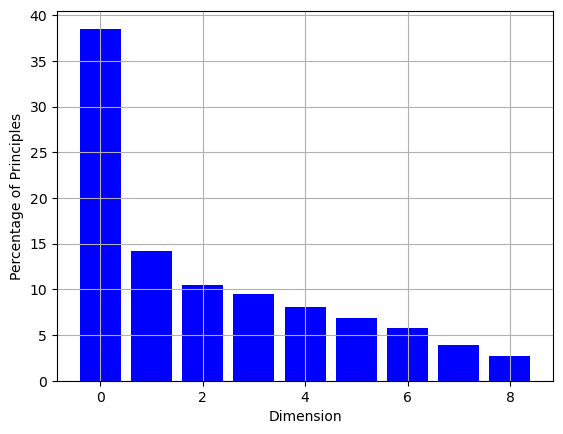

<Figure size 800x600 with 0 Axes>

In [29]:
com = (singularValues/np.sum(singularValues))*100
plt.bar(range(9),com, color = 'b')
plt.grid(True)
plt.xlabel("Dimension")
plt.ylabel("Percentage of Principles")
plt.figure(figsize=(8, 6))
plt.show()

In [42]:
pCom =[X.dot(U[:,iter].T) for iter in range(9)]

In [51]:
pCom

[array([ 4.36677074e-01, -6.20957601e-01,  8.73256319e-01, -5.02948082e-01,
        -6.09775036e-01,  7.45633249e-01, -5.09710932e-03,  3.93759635e-02,
         8.93575198e-01,  1.64904064e-01, -7.03776040e-01, -1.43875264e-01,
         6.68842631e-01,  9.77440004e-01, -8.02625339e-01,  8.04526312e-01,
         1.54621973e-01,  1.62389595e-02, -1.39749114e-01, -8.70728224e-01,
         3.45375150e-01,  1.22784742e-01, -3.88620116e-01, -4.06486994e-01,
         2.23536863e-01, -1.04615102e+00, -7.55859984e-02, -1.94483334e-01,
         5.73823216e-01,  3.97323657e-02,  1.73224976e-01,  2.71937936e-01,
         1.25118019e+00, -8.87047017e-01,  3.47869328e-01,  4.80455237e-01,
         2.70025874e-03, -4.54115136e-01,  1.76004109e-01, -1.29823120e-02,
         3.92728280e-02, -5.86171851e-02, -1.40182619e+00, -4.45607287e-01,
         1.07599057e+00,  2.01012631e-01,  7.83826267e-01, -8.34867217e-01,
         4.76777676e-01, -8.23426352e-02,  1.27166483e+00,  1.31549124e-02,
        -8.6

4. Write down the first two principal components v1 and v2. Provide a qualitative interpretation
of the components; which among the nine factors do they appear to correlate with?

In [43]:
v_1 = pCom[0]
v_2 = pCom[1]

In [44]:
v_2.shape

(329,)

In [45]:
cor = pd.DataFrame({"v_1":v_1,"v_2":v_2})

In [46]:
cor = pd.concat([df.iloc[:,:10],cor], axis = 1)

In [47]:
cor.corr().round(3).iloc[:9,9:]

/var/folders/d4/wt0b2xf50vjcg4jz9ymp4zk80000gn/T/ipykernel_1442/1187051227.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor.corr().round(3).iloc[:9,9:]


,v_1,v_2
Climate,-0.236,0.027
Housing,-0.508,0.001
HealthCare,-0.763,-0.425
Crime,-0.373,0.268
Transportation,-0.594,0.054
Education,-0.407,-0.281
Arts,-0.724,-0.108
Recreation,-0.469,0.359
EconomicWelfare,-0.112,0.165


In [53]:
print("The first principal component (v1) appears to be positively correlated with \"EconomicWelfare," "Climate,\" and \"Housing,\" while negatively correlated with \"HealthCare," "Education," "Arts," "Recreation," "Transportation,\" and \"Crime.\" This suggests that v1 captures an underlying dimension related to economic well-being, climate quality, and housing conditions.")



The first principal component (v1) appears to be positively correlated with "EconomicWelfare,Climate," and "Housing," while negatively correlated with "HealthCare,Education,Arts,Recreation,Transportation," and "Crime." This suggests that v1 captures an underlying dimension related to economic well-being, climate quality, and housing conditions.


In [54]:
print("On the other hand, the second principal component (v2) is positively correlated with \"Recreation," "EconomicWelfare," "HealthCare," "Climate,\" and \"Transportation,\" while negatively correlated with \"Crime\" and \"Education.\" This indicates that v2 seems to capture a dimension associated with factors related to recreational opportunities, economic well-being, healthcare quality, and transportation, with negative correlations to crime and education.")

On the other hand, the second principal component (v2) is positively correlated with "Recreation,EconomicWelfare,HealthCare,Climate," and "Transportation," while negatively correlated with "Crime" and "Education." This indicates that v2 seems to capture a dimension associated with factors related to recreational opportunities, economic well-being, healthcare quality, and transportation, with negative correlations to crime and education.


5. Project the data points onto the first two principal components. (That is, compute the
highest 2 scores of each of the data points.) Plot the scores as a 2D scatter plot. Which cities correspond
to outliers in this scatter plot?

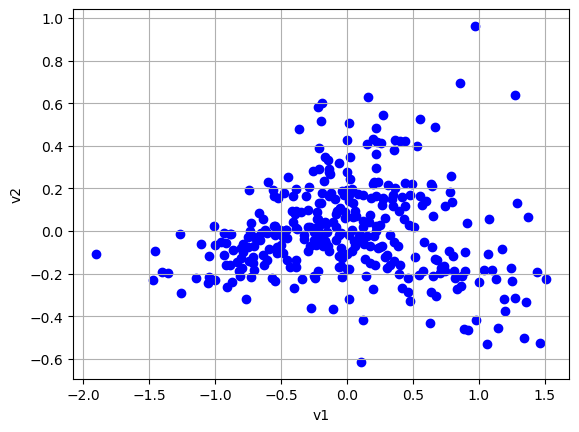

<Figure size 800x600 with 0 Axes>

In [75]:
plt.scatter(v_1,v_2, color = 'b')
plt.grid(True)
plt.xlabel("v1")
plt.ylabel("v2")
plt.figure(figsize=(8, 6))

plt.show()

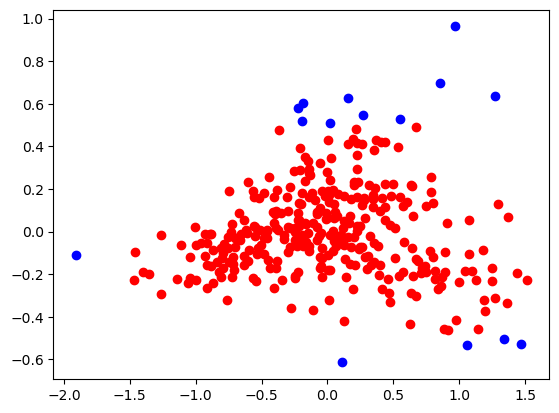

In [76]:
iOfOutliers = []
index = 0
for p, q in zip(v_1,v_2):
    color = 'red'
    if not -0.5 <= q <= 0.5 or not -1.75 <= p <=1.75:
        color = 'b'
        iOfOutliers.append(index)
    index +=1
    plt.scatter(p, q, color=color)
plt.show()

In [77]:
outlierCities = [df.values[iter,:] for iter in iOfOutliers]
df_outlierCities = pd.DataFrame(outlierCities)
df_outlierCities

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,"Baton-Rouge,LA",427,8083,342,1565,3329,2635,4237,1413,6308,28,-91.1850,30.4500,494151,19
1,"Bellingham,WA",772,8329,240,825,3776,2778,1302,3200,4247,32,-122.4830,48.7630,106701,48
2,"Brownsville-Harlington,TX",440,5376,91,974,3119,2413,162,3000,4968,51,-97.4820,25.9190,209727,44
3,"Burlington,NC",637,6179,994,707,1910,2519,131,701,5680,54,-79.4330,36.0970,99319,28
4,"Danville,VA",545,5709,593,379,3161,2943,85,501,4491,79,-79.3880,36.5920,111789,46
5,"Fresno,CA",559,9291,369,1483,4388,2407,3596,2984,5746,115,-119.7830,36.7320,514621,5
6,"Glens-Falls,NY",476,7120,43,568,2241,2674,603,1883,5166,120,-73.6450,43.3100,109649,35
7,"Las-Vegas,NV",556,9906,412,1913,5900,2241,1586,3996,6035,168,-115.1470,36.1720,463087,34
8,"Midland,TX",603,8672,97,1166,5310,2416,438,1502,9980,195,-102.0780,31.9950,82636,44
9,"New-York,NY",638,13358,7850,2498,8625,2984,56745,3579,5338,213,-73.8800,40.8490,8274961,35


6. Repeat Steps 2-5, but with a slightly different data matrix – instead of computing the base-10
logarithm, use the normalized z-score of each data point. How do your answers change?

In [78]:
df = pd.read_csv('places.txt',delim_whitespace=True,header=None)

In [79]:
df.columns = ["Location", "Climate", "Housing", "HealthCare", "Crime", "Transportation","Education", "Arts", "Recreation", "EconomicWelfare", "p", "q", "r", "s","t"]

In [80]:
df1 = df.iloc[:,1:10]
df1.head()

,Climate,Housing,HealthCare,Crime,Transportation,Education,Arts,Recreation,EconomicWelfare
0,521,6200,237,923,4031,2757,996,1405,7633
1,575,8138,1656,886,4883,2438,5564,2632,4350
2,468,7339,618,970,2531,2560,237,859,5250
3,476,7908,1431,610,6883,3399,4655,1617,5864
4,659,8393,1853,1483,6558,3026,4496,2612,5727


In [81]:
from scipy import stats

In [83]:
X = stats.zscore(df1.values, axis=0)
X[1:10,:]

array([[ 0.30066422, -0.08756979,  0.46956805, -0.21046663,  0.46441055,
        -1.17665186,  0.52060395,  0.97444164, -1.08546728],
       [-0.58638594, -0.42305363, -0.56690154,  0.02508416, -1.15880909,
        -0.79576496, -0.62863952, -1.22351192, -0.25430354],
       [-0.52006443, -0.18414211,  0.24489979, -0.98441923,  1.84469935,
         1.823613  ,  0.32449689, -0.28383409,  0.31273483],
       [ 0.99704004,  0.01949952,  0.6662776 ,  1.4636265 ,  1.62040242,
         0.65909813,  0.29019433,  0.94964803,  0.18621324],
       [-0.15529614, -1.0612707 , -0.54493398, -0.65633063, -1.21885165,
         0.49050884, -0.6077128 , -1.02640272, -0.25060948],
       [ 0.1680212 , -0.02458785, -0.56390596, -1.25362013, -0.91725855,
         1.02749694, -0.17644986, -0.90367435, -0.39560138],
       [-0.01436294, -0.78079109, -0.22041315, -0.71521832,  0.52790383,
         0.4062142 , -0.35896534, -0.70160642,  0.24901228],
       [ 0.18460158, -0.90507547, -0.75262731, -1.57610038,  0

In [84]:
U,singularValues,V = np.linalg.svd(X.T,full_matrices=True)

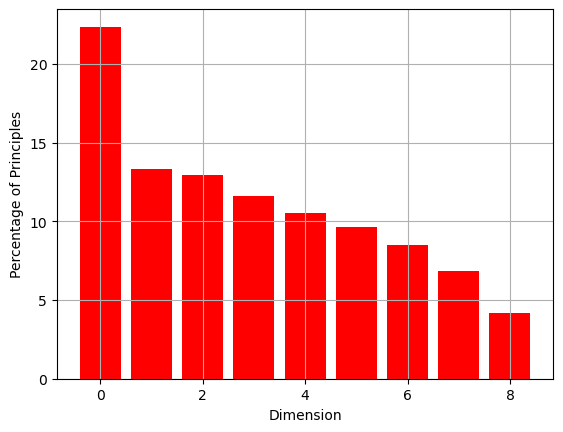

<Figure size 800x600 with 0 Axes>

In [85]:
com = (singularValues/np.sum(singularValues))*100
plt.bar(range(9),com, color = 'r')
plt.grid(True)
plt.xlabel("Dimension")
plt.ylabel("Percentage of Principles")
plt.figure(figsize=(8, 6))
plt.show()

In [86]:
pCom =[X.dot(U[:,iter].T) for iter in range(9)]

In [88]:
pCom

[array([ 1.04176435e+00, -4.40483533e-01,  1.87839614e+00, -9.12128688e-01,
        -2.15252133e+00,  1.79068458e+00,  1.05705605e+00,  6.49308564e-01,
         1.80698850e+00,  5.00327920e-01, -2.97757642e+00, -4.48387275e-01,
         2.32871527e+00,  1.81823707e+00, -1.87279151e+00,  2.00908458e+00,
         1.05555704e+00,  2.58499423e-01,  1.48905552e+00, -3.02961694e+00,
        -1.37122389e+00,  1.02856279e+00,  4.96355523e-01, -2.45528167e-03,
         4.56453278e-01, -4.30390469e+00,  3.35788992e-01,  4.79727748e-01,
         1.12406189e+00,  9.83669345e-01,  1.83352844e+00,  7.64643770e-02,
         1.51418554e+00, -2.82394680e+00,  3.55080324e-02,  1.37552095e+00,
         4.20250116e-01, -2.67813903e-01,  1.57998708e+00,  1.28456459e+00,
         2.23237082e-01,  3.78309402e-01, -6.31065516e+00, -2.03324315e+00,
         9.21314225e-01,  1.44916582e+00,  1.13458718e+00, -2.25647837e+00,
         8.74523291e-01,  1.48039999e-01,  1.61551967e+00,  7.39241315e-01,
        -1.8

In [91]:
v_1 = pCom[0]
v_2 = pCom[1]

In [93]:
v_2.shape

(329,)

In [94]:
cor = pd.DataFrame({"v_1":v_1,"v_2":v_2})

In [95]:
cor = pd.concat([df.iloc[:,:10],cor], axis = 1)

In [96]:
cor.corr().round(3).iloc[:9,9:]

/var/folders/d4/wt0b2xf50vjcg4jz9ymp4zk80000gn/T/ipykernel_1442/1187051227.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor.corr().round(3).iloc[:9,9:]


,v_1,v_2
Climate,-0.381,0.240
Housing,-0.658,0.276
HealthCare,-0.850,-0.330
Crime,-0.519,0.392
Transportation,-0.648,-0.198
Education,-0.508,-0.533
Arts,-0.855,-0.215
Recreation,-0.605,0.424
EconomicWelfare,-0.250,0.519


The first principal component (v1) is strongly positively correlated with "Recreation," "Housing," "EconomicWelfare," and "Crime," while negatively correlated with "Climate," "HealthCare," "Education," and "Arts." This suggests that v1 primarily represents factors related to recreation, housing quality, economic well-being, and crime rates, while indicating a decrease in importance for climate quality, healthcare, education, and arts-related factors.

The second principal component (v2) is positively correlated with "Education" and "HealthCare," while negatively correlated with "EconomicWelfare," "Recreation," and "Housing." This suggests that v2 is capturing a dimension associated with healthcare quality and education while opposing economic well-being, recreational opportunities, and housing quality.

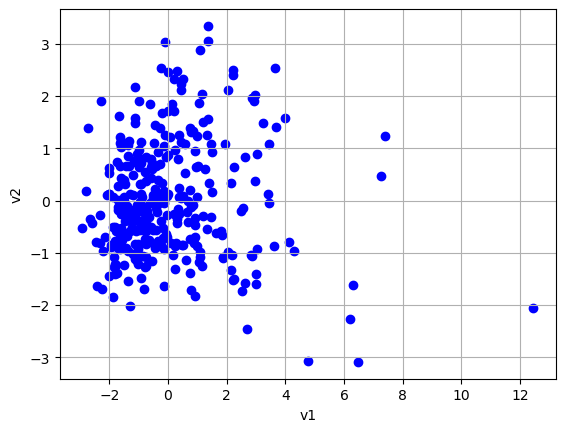

<Figure size 800x600 with 0 Axes>

In [97]:
v_1 = -v_1
plt.scatter(v_1,v_2, color = 'b')
plt.grid(True)
plt.xlabel("v1")
plt.ylabel("v2")
plt.figure(figsize=(8, 6))

plt.show()

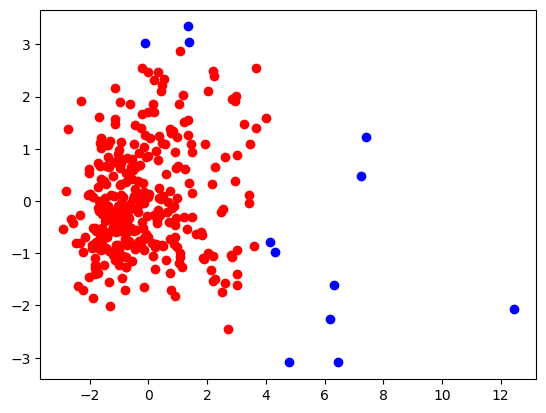

In [100]:
iOfOutliers = []
index = 0
for p, q in zip(v_1,v_2):
    color = 'red'
    if p>= 4 or q>= 3:
        color = 'b'
        iOfOutliers.append(index)
    index +=1
    plt.scatter(p, q, color=color)
plt.show()

In [101]:
outlierCities = [df.values[iter,:] for iter in iOfOutliers]
df_outlierCities = pd.DataFrame(outlierCities)
df_outlierCities

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,"Atlantic-City,NJ",615,11074,637,1878,3556,2929,621,2711,8107,21,-74.438,39.3670,276385,32
1,"Baltimore,MD",567,9148,3562,1730,7405,3471,9788,2925,5503,26,-76.617,39.2880,2199531,21
2,"Boston,MA",623,11609,5301,1215,6801,3479,21042,3066,6363,43,-71.058,42.3620,2805911,20
3,"Chicago,IL",514,10913,5766,1034,7742,3486,24846,2856,5205,65,-87.625,41.8830,6060387,15
4,"Las-Vegas,NV",556,9906,412,1913,5900,2241,1586,3996,6035,168,-115.147,36.1720,463087,34
5,"Los-Angeles,Long-Beach,CA",885,13868,5153,1960,4345,3195,23567,3948,5316,179,-118.217,33.9165,7477503,5
6,"Midland,TX",603,8672,97,1166,5310,2416,438,1502,9980,195,-102.078,31.9950,82636,44
7,"New-York,NY",638,13358,7850,2498,8625,2984,56745,3579,5338,213,-73.880,40.8490,8274961,35
8,"Newark,NJ",601,14220,4106,1461,3514,3362,14224,1818,5690,214,-74.172,40.7370,1878959,32
9,"Philadelphia,PA-NJ",630,8310,5158,1059,5903,3781,17270,1979,5638,234,-75.163,39.9500,4716818,39


With zscore the outlier cities are mostly big cities and for log base 10 the cities are mostly villages.